<a href="https://colab.research.google.com/github/nairakhilsukuma/CMU11785-Deep-Learning/blob/master/Exam1_06625_akhiln.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**06-625 Chemical and Reactive Systems, EXAM I \
Assigned: Monday, October 4th, 2021 at 8:00 am \
Due: Monday, October 4th, 2021 at 9:50 am**


**Plan your time carefully. Submit .pdf copy of your solutions through canvas and .ipynb through [google form](https://docs.google.com/forms/d/155LlaxlaDWHp_k_qrNLpfQq-GruIUBt9wxrO0A2tc1g/edit?usp=sharing) :** \
\
Problem 1:	45 points	 \
Problem 2:	50 points	 \
Presentation 	5 points	


**Read these instructions and sign below:**

*   This exam is open book, notes, computer, calculator, and internet. 
*   **Do NOT consult with your classmates or other people with regards to this exam. If you are caught consulting with outside help or have extremely similar solution to a classmate, you will automatically receive a zero on this exam.**
*   DOUBLE CHECK YOUR FILE UPLOADs. No late exams will be accepted. 
*   State any assumptions you make when solving the problems, and be sure to use an appropriate number of significant figures and proper units when reporting your answer.
*  **Type out all  equations you derive prior to inserting them into your numerical solver. If you do not have the equation written down but have it correctly typed in your Python code, you will not receive credit for this equation.**
* Please box your final answer (use \boxed in latex).
* Include your commented Python code. 
*	5 points will be given for presentation to make sure your work is easy to follow and you use correct Latex notation \

**I have read these instructions and am following them:**

Print your name: AKHIL NAIR

Andrew ID: akhiln



# Question 1
The follow gas-phase reactions are taking place in a spherical, variable volume (constant pressure) batch reactor. The reactor is charged with pure $A$ (no inerts) at an initial volume, $V_o = 100 \ L$, and at $P=1 \ atm$ and $T=300 \  K$. \
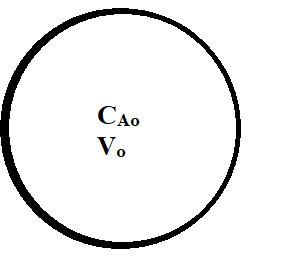

$2A \rightarrow B + C$ , $k_1 = 20 \ min^{-1} \ M^{-1}$ \
$A + B \rightarrow AB$ , $k_2 = 10 \ min^{-1} \ M^{-1}$ \
$ 2AB \rightarrow 3B + C$ , $k_3 = 5 \ min^{-1} \ M^{-1}$ 


## Question 1A [10 pts]

Write out the equations needed to solve for the concentrations of each compound as a function of time.

$\large \underline{\color{blue}{Given\ the\ elementary \ reactions:}}
 $ 
$\require{mhchem}$
\begin{equation*} 
\ce {2A -> B + C}\\
\ce {A + B -> AB}\\
\ce {2AB -> 3B}\\
\end{equation*}

 $ The \ reactor \ being \ used \ is \ in \ batch \ operation \ and \ reactants\ are\ liquids $ \

 $\color{blue}{\large \underline {\ The\ rate\ law \ of \ reaction\ is:}}$ 

$$ r = [kC_A^2,kC_{A}C_{B},kC_{AB}^2] \\ $$
$\color{blue}{\large \underline{\ The\ design\ equation\ of\ any\ reactor:}}$ \\
$$
\begin{equation}
F_{j0}-F_{j}+\ R_{j} \Delta V = \frac{dN_{j}}{dt}
\end{equation}
\\ $$
$\color{blue}{\large \underline{Modified\ equation\ of\ a\ batch\ reactor:}}  $

$(Assuming \ reactor \ is \ well \ mixed \ and \ batch \ operation )\\ $
$$
\begin{equation}
\ R_{j}. V = \frac{dN_{j}}{dt}
\end{equation}
\\ $$
$Incorporating \ the \ rate \ law \ we \ get: \\ $
\begin{align*}
\ce 
\begin{bmatrix}
\frac{dN_{A}}{dt}\\
\frac{dN_{B}}{dt}\\
\frac{dN_{C}}{dt}\\
\frac{dN_{AB}}{dt}\\
\end {bmatrix} = 
\begin{bmatrix}
-2 & 1 & 1 & 0  \\
-1 & -1 & 0 & 1\\
0 & 3 & 1 & -2 \\
\end{bmatrix}^T
\begin{bmatrix}
\ kC_{A}^2\\
\ kC_{A}C_{B}\\
\ kC_{AB}^2 \\
\end{bmatrix}V
\end{align*}
$which \ is \ the \ required \ mole \ balance \\ $

$\underline{\color{blue}{The \ initial \ conditions \ required \ are: }}  $ \\
$At \ time \ t=0, \ Concentrations \ are\ Nj0=[4.06,0,0,0] \\ $ \\
$Assuming\ that\ the\ gas\ is\ ideal$

## Question 1B [20 pts]

In two separate graphs, show how (1) concentration of each compound changes with time and (2) how the radius of the reactor changes with time (up to 20 min).


$The\ concentrations\ C_{j}\ will\ be\ recovered\ from\ the\\ flowrates\ N_{j}\ using\ the\ ideal\ gas\ law:$ \\
$C_{A} = \frac{P_o}{R T} \, \frac{N_{A}}{\Sigma N_{j}}$ \\
$C_{B} = \frac{P_o}{R T} \, \frac{N_{B}}{\Sigma N_{j}}$ \\
$C_{C} = \frac{P_o}{R T} \, \frac{N_{C}}{\Sigma N_{j}}$ \\
$C_{AB} = \frac{P_o}{R T} \, \frac{N_{AB}}{\Sigma N_{j}}$

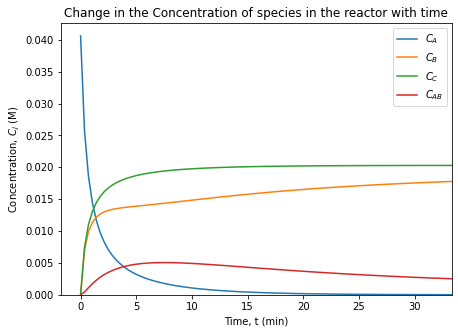

In [ ]:
#Calculating the concentration of A we get:
#Assuming it to be an ideal gas: PV=nRT
P0=1 #atm
V0=100#L
T=300#K
R=0.0821  #L/atm
NA0=P0*V0/(R*T)
k1=20
k2=10
k3=5

#Importing libraries
import numpy as np
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#initial conditions

N0 = np.array([NA0, 0, 0, 0,V0]) #in M

#constants from reaction

ki=np.array([20, 10, 5]) 

#Stoichiometric matrix
nu = np.array([[-2, 1, 1, 0],[-1, -1, 0, 1],[0, 3, 1, -2]])

#Defining function for number of moles
def dNdt(Ni,t, nu, ki):

# UNPACKING N AND K  
    NA, NB, NC, NAB, V = Ni
    N=NA+NB+NC+NAB
    V= V0*(N/NA0)  
    CA=(NA/N)*(P0/(R*T))
    CB=(NB/N)*(P0/(R*T))
    CC=(NC/N)*(P0/(R*T))
    CAB=(NAB/N)*(P0/(R*T))
    k1, k2, k3 = ki
    r = np.array([k1*(CA)**2, k2*(CB)*(CA), k3*(CAB)**2])
    Rj=nu.T @ r
    dNdt = Rj*V
    dNdt=np.append(dNdt,V)
    return dNdt
    
#Time space for integration: TIME INTERVAL FOR THE INTEGRATION as 2000 seconds

Vspan = np.array([0, 35]) 
tval=np.linspace(*Vspan,100)

# Cio IS THE INITIAL MOLE AND ARGUMENTS ARE nu AND Ki

sol = odeint(dNdt, N0, tval,args=(ki, nu))

#sol is in terms of Njs, so we need to convert to Cj
Nj=sol[:,0:len(sol[0])-1] #break up moles from sol
Ntot=np.sum(Nj,axis=1) #total mole
volume=V0*Ntot/NA0  #volume in a 100 row array

newarray = [volume for i in range(0,4)] #changes volume flow into 100x4 array
#print(newarray[0])
Cj=np.divide(Nj,np.array(newarray).T) #calc Conc

# plot concentration of each species
plt.figure(figsize=(7,5))
plt.plot(tval, Cj.T[0], label = '$C_{A}$')
plt.plot(tval, Cj.T[1], label = '$C_{B}$')
plt.plot(tval, Cj.T[2], label = '$C_{C}$')
plt.plot(tval, Cj.T[3], label = '$C_{AB}$')
plt.xlabel('Time, t (min)')
plt.ylabel('Concentration, $C_j$ (M)')
plt.title('Change in the Concentration of species in the reactor with time')
plt.xlim(right=200/6)
plt.ylim(bottom=0)
plt.legend()
plt.show()








$\color{blue}{\large \underline{\ The\ design\ equation\ of\ any\ reactor:}}$ \\
$$
\begin{equation}
F_{j0}-F_{j}+\ R_{j} \Delta V = \frac{dN_{j}}{dt}
\end{equation}
\\ $$
$\color{blue}{\large \underline{Modified\ equation\ of\ a\ batch\ reactor:}}  $

$(Assuming \ reactor \ is \ well \ mixed \ and \ batch \ operation )\\ $
$$
\begin{equation}
\ R_{j}. (\Delta V) = \frac{dN_{j}}{dt}
\end{equation}
\\ $$ \\

$Now,\ the\ volume\ of \ the\ reactor\ is\ related\ to\ its\ radius\ as:$ \\


\begin{equation}
\ \frac{ d(\frac{4}{3}\ \pi.r^3)}{dt} = \frac{dV}{dt}
\end{equation} \\

$This\ equation\ will\ allow\ us\ to\ find\ the\ change\ in\ reactor\ radius\ with\ time.
$


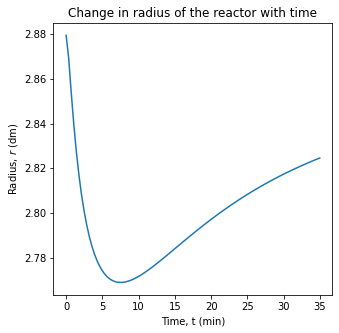

In [ ]:
#To find the radius of the balloon, we have:
r=((3/(4*np.pi))*volume)**(1/3)
plt.figure(figsize=(5,5))
plt.xlabel('Time, t (min)')
plt.ylabel('Radius, $r$ (dm)')
plt.title('Change in radius of the reactor with time')
plt.plot(tval,r)
plt.show()










## Question 1C [5 pts]
Explain the trends you observe. Write 2-4 complete sentences.

**For an isothermal reaction** \\

The time to reacha  given conversion is the same for a reaction of any order if there is no change \\
in the number of moles. If the number of moles increase, as in the case given and the reaction \\
order is greater than 1, then it takes longer to reach the same conversion point in the constant-pressure \\
 reactor, because the volume increases as the reaction proceeds, \\
  thus decreasing the reactant concentration and lowering the reaction rate. \\

**In this reaction:** \\

a)The species AB was being consumed as soon as it was produced
 which didn't allow much increase in its \\
 production and concentration
 increase was suppressed. \\

b)The species A got used up quickly as it was being used for 2 reactions simultaneously. \\

c)The concentration of species B increased exponentially but 
tapered off as the production of AB started. \\

d) The concentration of species C increased exponentially untill it
 reached steady state concentration. \\

**Radius of the reactor with time:** \\

Radius of the reactor increases with time, the increase is because of the number of moles of the gaseous \\
 products increasing inside the reactor which blows up the balloon with the passage of time.

## Question 1D  [10 pts]

Now assume the reactor is not at constant pressure and not constant volume.  
The initial pressure of the reactor is 1 atm. The pressure will increase a function 

of radius of the reactor, $R$, such that

$\frac{dP}{dR}=0.005 \ atm \ cm^{-1}$

Provide any additional equations you need to solve for $C_j$ 

at any point in time and comment (2-4 sentences) 

how changing pressure will change $C_j$ compared to your answer 

in Question1 B. DO NOT NUMERICALLY SOLVE THIS.

$ Here\ the\ volume\ will\ be\ a\ function\ of\ Pressure\ thus\ cannot\ be\ taken\ as\ constant:$

$\frac{dP}{dR}=0.005 \  atm \ cm^{-1}$ \\

a.The above equation will lead to an increase in pressure of the system

 as time proceeds due to the increasing radius of the reactor given 
 
 the increasing volume due to the number of moles as has been inferred by the above graph.

b.The effects due to the variable pressure and the variable volume will be competing each

 other depending on the type of gas in the batch reactor since :$$P \propto \frac{1}{V}$$

c.The concentration Cj of the species A will not reduce as fast as in the variable volume system

 due to lesser dilution of the system due to less volume increase. \\

d. In case of non-isothermal and non-ideal systems, the temperature will compensate for the 

increase in pressure and volume leading to a rapid heat up of the gas during which the order of reaction 

will dictate the concentration changes of the species. An energy balance equation is required to

 solve such non ideal situations.

e. The additional equations required to solve the problem would be:

Since pressure also changes then in order to incorporate pressure change we will have additional 

$P/P_o$ terms associated with change in moles.


 Given:
$\frac{dP}{dR}=0.005 \  atm \ cm^{-1}$ \\
$$dV=4 \pi R^{2}dR \ \ \ \ as\ per\ geometry$$ \\

$$\frac{dP}{dV}=\frac{0.005}{4 \pi R^{2}}$$ \\
$$Since\ R=(\frac{3 \times V}{4 \pi})^{2/3}$$ 

$The\ differential\ equation\ formed\ is:$
$$\frac{dP}{dV}=\frac{0.005 \times (4 \pi)^{2/3}}{(3 \times V)^{2/3}}$$ \\

$Integrating\ this\ equation\ we\ get:$

$$P=P_{0}+\frac{0.005 \times (4 \pi)^{2/3}}{(3)^{-1/3} }\times (V^{1/3}-V_{0}^{1/3})$$ \\
$Since\ we\ already\ know\ that\ the\ volume\ in\ the\ batch\ reactor\ will\ change:$
$$V=V_{0} \times \frac{P_{0}}{P}\times \frac{\Sigma F_{final\ mole\ flowrate}}{\Sigma F_{initial\ mole\ flowrate}}$$

$We\ can\ plug\ in\ the\ P\ term\ derived\ earlier\ in\ this\ equation\ to\ find\ the\ volume.$ \\

$\underline{\color{blue}{The\ initial\ conditions\ given\ are:}}$

$At \ time \ t=0, \ Concentrations \ are\ Nj0=[4.06,0,0,0] \\ $ \\
$Assumption\ that\ the\ gas\ is\ ideal$


# Question 2
The following gas-phase reactions are occuring in a packed bed reactor with a membrane that selectively removes C at $R_{mem}=k_{mem}C_C$ where $k_{mem}=0.1 \ L \ g.cat^{-1} s^{-1}$. Pressure drop in the reactor follows $\frac{dP}{dW} = -0.1 \ atm \ g.cat^{-1}$

$A +2B \rightarrow C , k_1=0.25 \ L \ g.cat^{-1} s^{-1}, \ r_1=k_1C_A $\
$2A + 3C \rightarrow D, \ k_2=5 \ L^2 \ mol^{-1} g.cat^{-1} s^{-1}, \ r_2=k_2 C_A C_C$

Additional information: \
$v_o= 50 \ L s^{-1}$ \
$P_o=10 \ atm$ \
$T=500 \ K$ \
$C_{Ao}=0.05 \ mol \ L^{-1}$ \
$C_{Bo}=0.1 \ mol \ L^{-1}$ \
$W= 500 \ g$


## Question 2A [2 pts]
Calculate the initial molar flow for each compound entering the reactor

$\underline{\color{blue}{The\ molar\ flow\ is\ given\ as:\ (Volumetric\ flow\times Concentration) }}$ \\

$Thus:$ \\
$FA0=vo \times CAo\ =2.5\  mols^{-1}\ which\ is\ the\ flowrate\ of\ species\ A$ \\
$FB0=vo\times CBo\ = 5\  mols^{-1}\ which\ is\ the\ flowrate\ of\ species\ B$ \\
$FC0=vo\times CCo\ = 0\ mols^{-1}\ which\ is\ the\ flowrate\ of\ species\ C$ \\
$FD0=vo\times CDo\ = 0\ mols^{-1}\ which\ is\ the\ flowrate\ of\ species\ D$ \\

$From\ the\ ideal\ gas\ law\ we\ know\ that:$
$$ PV=nRT \\
\ Thus\  (PV/RT)=F_{total}\ i.e\ the\ number\ of\ moles\ of\ species\ in\ the\ system$$ \
$$We\ get\ C_{total}= \frac{10}{0.0821 \times 500}=12.18mols^{-1} \\\ assuming\ R=0.0821atm L^{-1}mol^{-1}$$ \
$Thus\ F_{inert}\ the\ molar\ flowrate\ of\ inerts\ in\ the\ reactor\ is\ 12.18-7.5=4.68 mols^{-1}$

## Question 2B [10 pts]
Write down the equations needed to solve for the exit concentrations of each compound exiting the reactor.

$\color{blue}{ \underline {The\ design\ equation\ of\ a\ Membrane\ reactor\ is\ given\ as:}}$
 $$
\begin{equation}
F_{j0}-F_{j}+\ R_{j} \Delta V - \ R_{mem}\Delta V = \frac{dN_{j}}{dt}
\end{equation}
\\ $$
$Assuming\ steady\ state\ of\ the\ PBR\ and\ approximating,\ we\ have: $ \\

 $$
\begin{equation}
F_{j}-F_{j0}= \ R_{j} \Delta V - \ R_{mem}\Delta V
\end{equation} 
\\ $$
 $$
\begin{equation}
\frac{dFj}{dV}= \ R_{j}-  \ R_{mem}
\end{equation}
 $$ \\
$\color{blue}{ \underline{The\ reactions\ given\ are:}}$

$A +2B \to C$. \\
$2A +3C \to D$.

$\color{blue}{\underline{The\ mole\ balances\ for\ all\ components\ in\ matrix\ form\ is\ given\ as:}}$
$$
\begin{bmatrix}
\frac{dF_{A}}{dW}\\
\frac{dF_{B}}{dW}\\
\frac{dF_{C}}{dW}\\
\frac{dF_{D}}{dW}\\
\frac{dF_{in}}{dW}
\end {bmatrix} = 
\begin{bmatrix}
-1 & -2 \\
-2 & 0   \\
1 & -3 \\
0  & 1 \\
0  & 0 \\
\end{bmatrix}
\begin{bmatrix}
k1C_{A}\\
k2C_{A}C_{C}
\end{bmatrix}
-
\begin{bmatrix}
0  \\
0\\
k_{mem}C_{C}   \\
0 \\
0 \\
\end{bmatrix}
$$ \\
$
The\ equation\ for\ pressure\ drop\ is\ given\ by\ \frac{dP}{dW}=-0.01\ atm.g.cat^{-1}$ \\

$\nu = \nu_o \frac{P_o}{P}\frac{T}{T_o}\frac{\sum{F_j}}{\sum{F_{j,o}}}$

$Isothermal\ process,\ so\ the \ temperature\ ratio\ goes\ to\ 1 $

$\frac{dF_j}{dW} =R_j - R_{mem,j}$

$\color{blue}{\underline{The\ initial\ conditions\ for\ the\ reaction\ are\ given\ as:}} \\
Concentration\ at\ time\ t=0\ is\ [0.05,0.1,0,0,0.0936]\ ;W=0\ and\ P0\ is\ 10\ atm. $

$\color{blue}{\underline{Exit\ concentrations\ of\ species\ can\ be\ solved\ for\ by\ using:}}$

$C_{j} = \frac{F_j}{\nu}$

## Question 2C [20 pts]

Graph $\frac{P}{P_o}$ vs $W$ and $C_j$ vs $W$

$Inerts\ dont\ participate\ in\ the\ reaction.$ \\

$\color{blue}{\underline{The\ expression:}}$\
$\frac{dP}{dW} = -0.01 \, atm \, g \cdot cat^{-1}$ \\

$Will\ give\ us\ the\ pressure\ drop\ in\ the\ reactor\ while\ traversing\ along\ weight\ of\ catalyst\ w.$

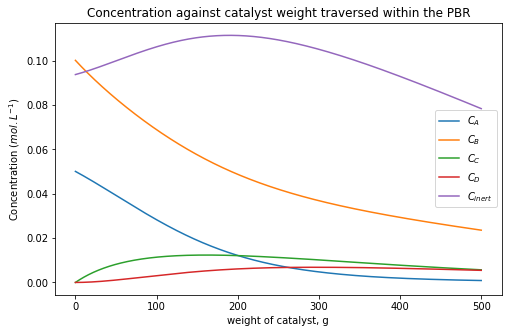

In [6]:
#Importing all the required libraries:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#Defining all the parameters given:
kmem=0.1 #Lgcat-1
T0=500 #K
V0=50 #L/s
P0 = 10 # atm  
Wcat=500 #g

#Defining the concentration given: (including Cmem)
Cj0 = np.array([0.05,0.1, 0 ,0,0.094,0])

#Converting the concentration to flowrate:
Fj0=Cj0*V0

#Required flowrate calculation and distribution to Flowrates that are known:
Fj0sum=np.sum(Fj0)

#Defining rate constants:
k1=0.25  #Lmol-1
k2=5  #L2mol-1
kmem=0.1   #Lmol-1

#Defining the path inside the MR:
W_span =(0,Wcat)  # catalyst weight range from 0 to 0.5 kg
W_val=np.linspace(*W_span,1000)

#Defining a function for the required calculations:
def FMemPFR(W_val,Fj):
#def FMemPFR(Fj,W_val):
#Unpacking the Flow terms:
  FA,FB,FC,FD,Fin,Fmem,P=Fj

  Fjsum=FA+FB+ FC+ FD+Fin

#Instantaneous Volumetric flow rate
  V=V0*P0/P*(Fjsum/Fj0sum)

#Now using Fj to unpack the concentrations  (will have to find P at every time step)    
  Ca = FA/V
  Cb = FB/V
  Cc = FC/V
  Cd = FD/V
  Cin= Fin/V
# Use the molar concentrations to calculate reaction rates and differentials
  r1 = k1*Ca
  r2 = k2*Ca*Cc

#Rate laws given by:
  dFadW =-r1-2*r2
  dFbdW =-2*r1
  dFcdW =r1-3*r2 - kmem*Cc
  dFddW =r2
  dFindW=0
  
#For the next question trying to isolate Fcmem
  dFcmemdW = kmem*Cc    

  dPdW =-0.01
  return [dFadW, dFbdW, dFcdW, dFddW,dFindW, dFcmemdW, dPdW]

#Appending the pressure term:
F0=np.array([2.5,5, 0 ,0,4.68,0,10])

#Using the solve_ivp function from scipy to integrate at every time step.
sol= solve_ivp(fun=FMemPFR, t_span=W_span,y0=F0, t_eval=W_val)

#Taking the length upto last element of sol.y and-1 as last is Pressure. 
Fj = sol.y.T[:,0:len(sol.y)-1] 

#Breaking the pressure term.
P = sol.y.T[:,len(sol.y)-1]

#In the axis1, looks on row wise addn
Ftot = np.sum(Fj,axis=1)

#Equation for vol flow
vol_flow = V0*P0*Ftot/(P*Fj0sum)

#list comprehension for breaking volumetric flowrates
z = [vol_flow for i in range (0,6)]

# Returns as list values which have to be transposed
z=np.array(z)

#z has to be transposed for further
a= z.T

#To recover the concentration flowrates from the molar flow rates, avoided division by 1000
Cj = np.divide(Fj,a)
Ca, Cb, Cc, Cd,Cin, Ccmem = Cj.T
#To find P/P0 vs W , we define Pred
Pred= P/P0

# Plotting the solution
plt.figure(figsize=(8,5))
# Plot the concentrations of individual species against weight of catalyst
plt.plot(sol.t, Ca, label = 'A')
plt.plot(sol.t, Cb, label = 'B') 
plt.plot(sol.t, Cc, label = 'C')
plt.plot(sol.t, Cd, label = 'D')
plt.plot(sol.t, Cin, label = 'Inert')
plt.xlabel('weight of catalyst, g')
plt.ylabel('Concentration ($mol.L^{-1}$)')
plt.legend(labels=['$C_{A}$','$C_{B}$', '$C_{C}$', '$C_{D}$','$C_{inert}$'])
plt.title('Concentration against catalyst weight traversed within the PBR')
plt.show();











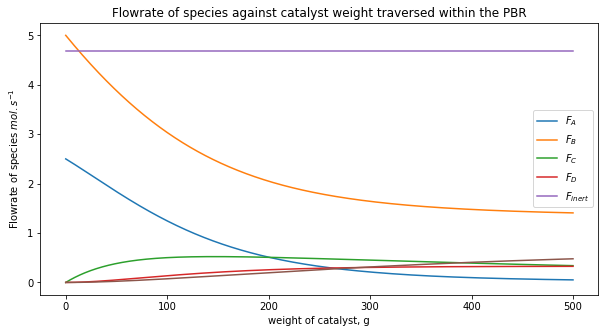

In [7]:


# Plot the Flowrates of individual species against weight of catalyst
plt.figure(figsize=(10,5))
plt.plot(sol.t,Fj);
plt.xlabel('weight of catalyst, g')
plt.ylabel('Flowrate of species $mol.s^{-1}$')
plt.legend(labels=['$F_{A}$','$F_{B}$', '$F_{C}$', '$F_{D}$','$F_{inert}$'])
plt.title('Flowrate of species against catalyst weight traversed within the PBR')
plt.show();










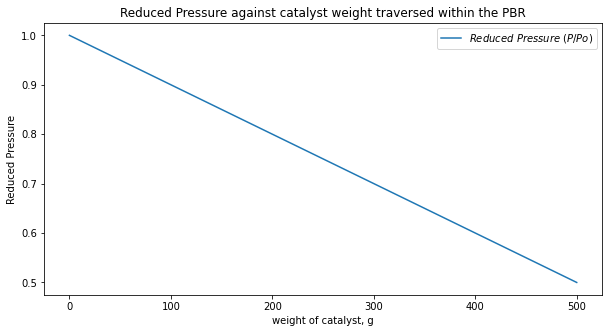

In [ ]:




# Plot the reduced pressure of individual species against weight of catalyst
plt.figure(figsize=(10,5))
plt.plot(sol.t,Pred);
plt.xlabel('weight of catalyst, g')
plt.ylabel('Reduced Pressure')
plt.legend(labels=['$Reduced\ Pressure\ (P/Po)$'], ncol=2,bbox_to_anchor=(1,1))
plt.title('Reduced Pressure against catalyst weight traversed within the PBR')
plt.show();





## Question 2D [8 pts]

Explain the trends observed in the graph (2-3 sentences) and compare conceptually how these trends are different when there is and is not a membrane removing C (1-2 sentences).

**SOLUTION:** \\

**GRAPH EXPLANATION:** \\

1)When there is a membrane in the above reactor, it just makes the second reaction  slower

 due to the unavailability of the diffusing species and makes component C the 
 
 **rate limiting key component** of the second reaction. \\

2)The concentration of species C increases in the initial steps but then drops as soon as the 

second reaction starts **progressing** and it starts diffusing out. \\

3)This is production of species D which requires 3 times of species C for its production is **supressed**

 due to the diffusion of C . \\

4)The components A and B characteristically attain their **steady state concentrations** as they 

traverse the catalyst length across the reactor.

**DIFFERENCE WITH AND WITHOUT MEMBRANE:** \\
1) Without the **removal of species C**, the gain of concentration of D slightly improves as the bottleneck

 of the requirement of species C for production of D is **removed partially**. \\

2)The concentration of **A drops faster** without the presence of a membrance which was earlier 

slower when the membrane was present as C was the rate limiter for the second reaction.

3)The concentration of C shows a slight positive trend.

4) Due to the overall increase of the number of moles of the system, the concentration of inerts falls \\
steeper than reaction with diffusion.

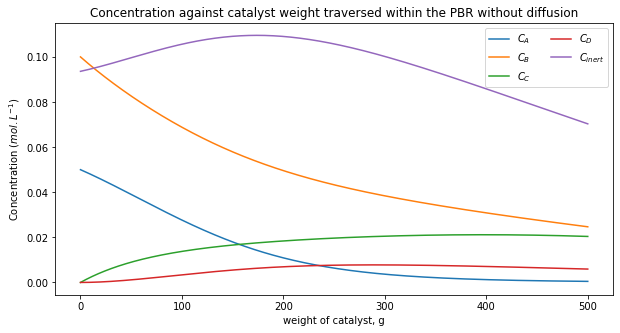

## Question 2E [10 pts]


Compound C diffuses from the reactor through a membrane into purified stream (shown in red). 

Calculate the molar flow rate of C in the purified stream exiting the system. Assume outside of the membrane has the same W-coordinate.

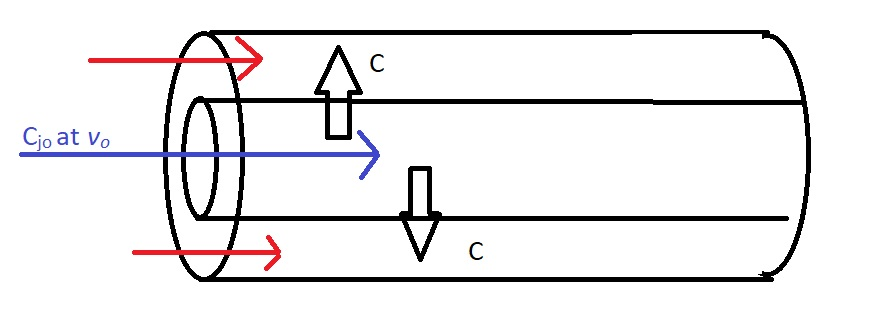


$\underline{\color{blue}{Given\ the\ diffusion\ rate\ law:}}$ \\

$\frac{dF_{mem,C}}{dW} = R_{mem,C}$ \\

$\underline{\color{blue}{We\ get:}}$ \\

$R_{mem,C} = k_{mem} C_C$

where $k_{mem} = 0.1 \, L \, g.cat^{-1} s^{-1}$

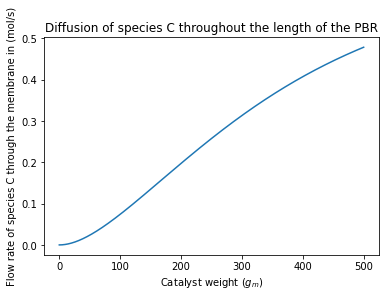

 The Flow rate of species C in the purified stream at the exit is 0.48 mol/s


In [ ]:
#Since we have already solved for Membrane concentration in the alst problem, slicing the array to get values: 
plt.plot(sol.t, Fj.T[-1])
#Visualising using matplotlib:
plt.xlabel('Catalyst weight ($g_m$)')
plt.ylabel('Flow rate of species C through the membrane in (mol/s)')
plt.title("Diffusion of species C throughout the length of the PBR")
plt.show()
print(f' The Flow rate of species C in the purified stream at the exit is {Fj.T[-1][-1]:1.2f} mol/s')

In [8]:
!pip install git+git://github.com/jkitchin/pycse &> /dev/null
from pycse.colab import pdf
%pdf

Installing xvfb. Please be patient.
Installing wkhtmltopdf. Please be patient.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>